importing the Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# loaing the csv data a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
# print first 5 rows in the datafame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of he dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# nuber of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basin informations the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
# geettting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [17]:
correlation = gold_data.select_dtypes(include=['float64', 'int64']).corr()

<Axes: >

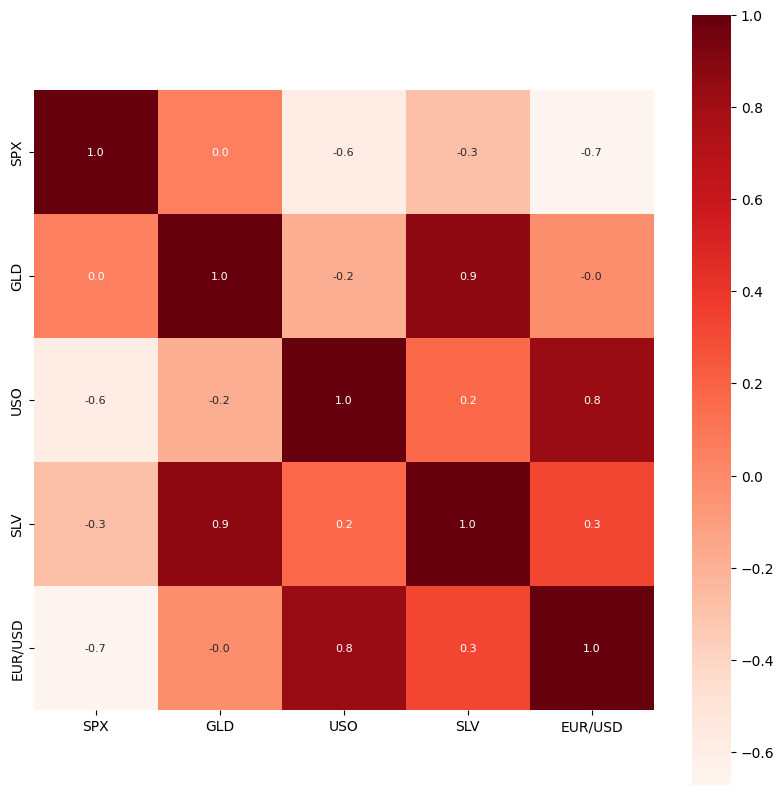

In [20]:
# constructing a heatmap to upderstand the correlatiom
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [21]:
# Correlation values of GlD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-26-820902903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

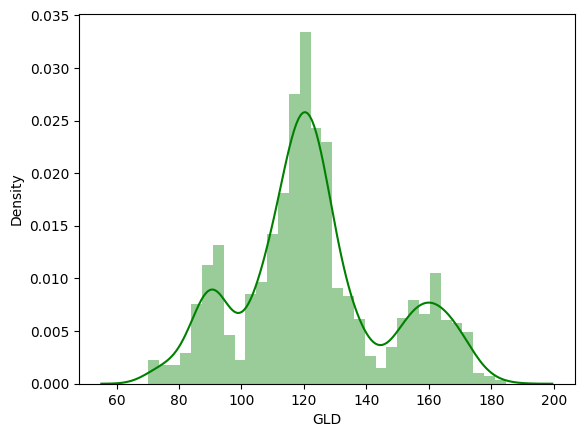

In [26]:
# checking the distriution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [28]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [29]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into Training data and Test Data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Mobel Evaluation

In [41]:
# prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.57039949  81.70680007 116.09750003 127.72930066 120.74190138
 154.78309767 150.33169812 126.17620008 117.39259875 126.04330053
 116.73150111 171.54330125 141.40659843 167.96469848 115.17660026
 117.47200072 137.89810271 170.09360096 159.75400364 159.87650044
 155.2530006  125.36989998 175.74619955 157.34400256 125.18020054
  94.03509959  77.58849993 120.69499962 119.1280996  167.59639953
  88.04230067 125.23689972  91.06600073 117.5914004  121.15949931
 136.30140021 115.42020118 115.39950045 148.49770009 107.43090114
 104.02820222  87.13529785 126.56140036 117.89970045 152.16179951
 119.76679982 108.35980008 108.01549837  93.0645004  127.0197981
  75.46230028 113.65779935 121.02750022 111.29339915 118.98349916
 121.11649923 159.36169916 167.66200117 146.95389661  85.70559834
  94.40890001  86.79009883  90.63059998 118.94410075 126.38750067
 127.5354999  170.57249955 122.33839928 117.26399897  98.32170041
 168.41770103 143.33139837 131.94350251 121.14400214 121.04969937
 119.730500

In [43]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892307883926357


Compare the Actual Values and Predicted Values in a plot

In [44]:
Y_test = list(Y_test)

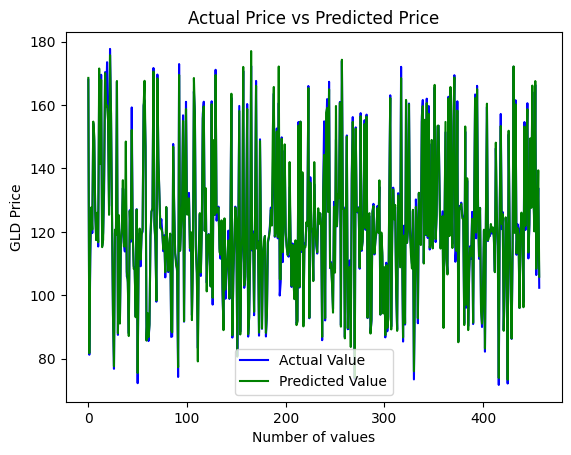

In [50]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()